In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.0.5
numpy version: 1.19.5
seaborn version: 0.11.2


# Transaction Train Data

This is the largest database containing everydat transactions in two years period. There is no missing data in this dataset.

In [2]:
df_transactions = pd.read_csv('/Users/marisatania/Downloads/transactions_train.csv')

Transactions data description:

- **t_dat** :  Date of a transaction in format YYYY-MM-DD but provided as a string.
- **customer_id** : A unique identifier of every customer (mapped to the customer_id in customers table)
- **article_id** : A unique identifier of every article (mapped to the article_id in articles table)
- **price** : Price of purchase
- **sales_channel_id** : sales channel 1 or 2

In [3]:
df_transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [4]:
df_transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


## EDA

In this EDA, we will analize the given transaction data and identify different product and customer behaviours, so they can be used as features while creating different recommendation models.

In [4]:
df_transactions.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [5]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [6]:
df_transactions.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

***

## Handling The Large Dataset

The transactions_train data has 31788324 non-null data with 1.2+ GB memory usage. We will apply a memory reduction technique by reducing the datatypes where there is un-necessary space. 

Code source: [Chris Deotte]('https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/308635')

In [7]:
df_transactions.memory_usage(deep=True)

Index                      128
t_dat               2129817708
customer_id         3846387204
article_id           254306592
price                254306592
sales_channel_id     254306592
dtype: int64

This memory trick will reduce the training data memory by 5x, from 96 bytes per row to 20 bytes per row.

The customer_id is a length 64 string which uses 64 bytes. The code below converts the column to int64 which only takes 8 bytes. Also the mapping is 1:1 which means each customer gets a unique int64. After we are done with your processing, i.e. train.groupby('customer_id'), we can merge this onto the sample_submission.csv dataframe.

In [8]:
df_transactions['customer_id'] = (
    df_transactions['customer_id'].apply(lambda x: int(x[-16:], 16)).astype("int64")
)
df_transactions['article_id'] = df_transactions["article_id"].astype("int32")
df_transactions['article_id'] = "0" + df_transactions.article_id.astype("str")

***

## Data Overview


### Article ID in Transaction

In [9]:
df_transactions.article_id.value_counts()

0706016001    50287
0706016002    35043
0372860001    31718
0610776002    30199
0759871002    26329
              ...  
0521266001        1
0548210003        1
0504619001        1
0564231010        1
0796294003        1
Name: article_id, Length: 104547, dtype: int64

In [17]:
# particulare article_id over time
df_transactions.loc[df_transactions['article_id'] == 141661025]

,t_dat,customer_id,article_id,price,sales_channel_id
780353,2018-10-05,e88c97847d0afb0c8df9ef41c69b6c555ebf7692c7cecd...,141661025,0.008475,1


In [ ]:
# stable item goes up, non stable goes up

# count of the sales , have the threshold, > 20,000 for example price goes up a staple
# customer id == member discount (same day different price)

# LOOK AT COlLABORATIVE FILTERING FOR FEATURE ENGINEERING
# for model --> collaborative filtering (recommender system, how netflix shows what moves you would watch next)
# which people are like you
# polkadot shirt

# https://web.stanford.edu/~lmackey/papers/cf_slides-pml09.pdf
# when you buy x , you will probably buy y

### Data Distributiom over time

In [11]:
df_transactions['t_dat'] = pd.to_datetime(df_transactions['t_dat'])

In [12]:
begin = df_transactions['t_dat'].min()
end = df_transactions['t_dat'].max()
print('Date range is from {} to {}.'.format(begin.date(), end.date()))

Date range is from 2018-09-20 to 2020-09-22.


In [13]:
transaction_time = pd.to_datetime(df_transactions['t_dat'])

In [15]:
table = pd.Categorical(transaction_time.dt.year.values.squeeze(),ordered=True).value_counts()
print(pd.DataFrame(table).T)

      2018      2019      2020
0  4411262  16396930  10980132


In [16]:
df_transactions.groupby(by=[df_transactions.t_dat.dt.year , df_transactions.t_dat.dt.month]).agg({'price' : ['min','max','mean','std']})

price                              
                  min       max      mean       std
t_dat t_dat                                        
2018  9      0.000678  0.591525  0.029853  0.023039
      10     0.000678  0.591525  0.029766  0.022821
      11     0.000678  0.591525  0.030694  0.022878
      12     0.000661  0.506780  0.028318  0.021112
2019  1      0.000678  0.506780  0.026475  0.018738
      2      0.000559  0.506780  0.027272  0.017981
      3      0.000542  0.422034  0.029181  0.018941
      4      0.000169  0.506780  0.029005  0.018441
      5      0.000237  0.494441  0.027788  0.017362
      6      0.000051  0.506780  0.025521  0.015543
      7      0.000102  0.422034  0.022344  0.015007
      8      0.000102  0.506780  0.024368  0.018323
      9      0.000017  0.506780  0.032843  0.023798
      10     0.000322  0.506780  0.032254  0.023553
      11     0.000237  0.506780  0.032432  0.023481
      12     0.000186  0.422034  0.027960  0.020273
2020  1      0.000034  0.506780  0.026751  0.017922
      2      0.000186  0.506780  0.028739  0.018844
      3      0.000153  0.506780  0.028894  0.017886
      4      0.000983  0.337288  0.028197  0.015885
      5      0.000203  0.456102  0.027277  0.015979
      6      0.000034  0.501339  0.024401  0.014761
      7      0.000136  0.506780  0.023946  0.015023
      8      0.000322  0.506780  0.026779  0.018287
      9      0.000322  0.506780  0.033577  0.022457

In [17]:
df_transactions.groupby(by=[df_transactions.t_dat.dt.month]).agg({'price' : ['min','max','mean','std']})

price                              
            min       max      mean       std
t_dat                                        
1      0.000034  0.506780  0.026602  0.018368
2      0.000186  0.506780  0.027954  0.018402
3      0.000153  0.506780  0.029053  0.018476
4      0.000169  0.506780  0.028620  0.017276
5      0.000203  0.494441  0.027549  0.016734
6      0.000034  0.506780  0.024983  0.015183
7      0.000102  0.506780  0.023030  0.015035
8      0.000102  0.506780  0.025565  0.018345
9      0.000017  0.591525  0.032388  0.023267
10     0.000322  0.591525  0.030888  0.023187
11     0.000237  0.591525  0.031538  0.023189
12     0.000186  0.506780  0.028141  0.020703

### Purchases per day

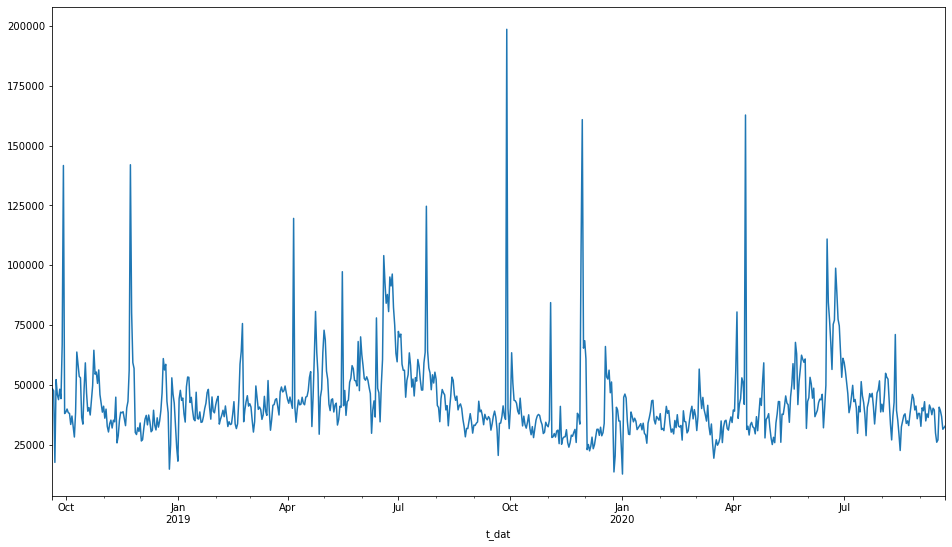

In [18]:
plt.figure(figsize=(16, 9))
df_transactions.groupby(['t_dat'])['article_id'].count().plot();

There are ~8 spikes per year. We need to dig dig deeper how the individual products trend over time.

In [22]:
t_per_day = df_transactions.groupby('t_dat',as_index=False).count()

In [23]:
t_per_day

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,48399,48399,48399,48399
1,2018-09-21,47543,47543,47543,47543
2,2018-09-22,17635,17635,17635,17635
3,2018-09-23,52230,52230,52230,52230
4,2018-09-24,45984,45984,45984,45984
...,...,...,...,...,...
729,2020-09-18,39284,39284,39284,39284
730,2020-09-19,36796,36796,36796,36796
731,2020-09-20,31489,31489,31489,31489
732,2020-09-21,32130,32130,32130,32130


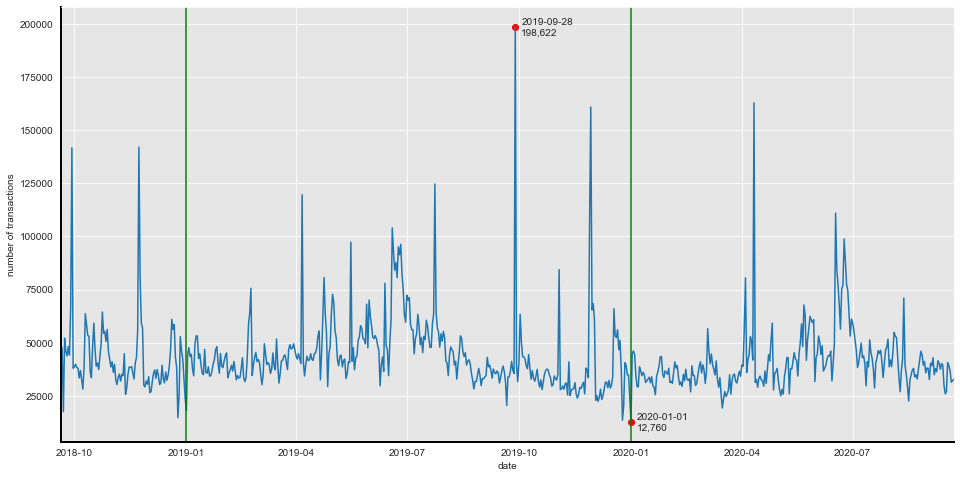

In [27]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(data=t_per_day, x='t_dat',y='customer_id')

ax.set_xlabel('date')
ax.set_ylabel('number of transactions')

ax.axvline(x=dt.datetime(2019,1,1), c='green')
ax.axvline(x=dt.datetime(2020,1,1), c='green')

max_t = t_per_day['customer_id'].max()
max_t_date = t_per_day[t_per_day['customer_id']==max_t]['t_dat']
ax.scatter(max_t_date, max_t, c='red')
ax.text(max_t_date+pd.DateOffset(days=5), max_t-4000, '{}\n{:,d}'.format(max_t_date.iloc[0].date(), max_t))

min_t = t_per_day['customer_id'].min()
min_t_date = t_per_day[t_per_day['customer_id']==min_t]['t_dat']
ax.scatter(min_t_date, min_t, c='red')
ax.text(min_t_date+pd.DateOffset(days=5), min_t-4000, '{}\n{:,d}'.format(min_t_date.iloc[0].date(), min_t))
ax.set_xlim(df_transactions['t_dat'].min(),df_transactions['t_dat'].max())

for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')

plt.show()

In [ ]:
# do a 7 days rolling avg to reduce noise
# https://www.cdc.gov/coronavirus/2019-ncov/covid-data/covidview/index.html

From the graph above we see that there are distinct variations and spikes in the number of transactions per day. It would be clearer to visualise this by using box plots with monthly aggregations.

In [19]:
trans_gr_month = df_transactions.groupby('t_dat').size().rename('no_transactions')
trans_gr_month = trans_gr_month.reset_index()
trans_gr_month['month_year'] = trans_gr_month['t_dat'].dt.to_period('M')

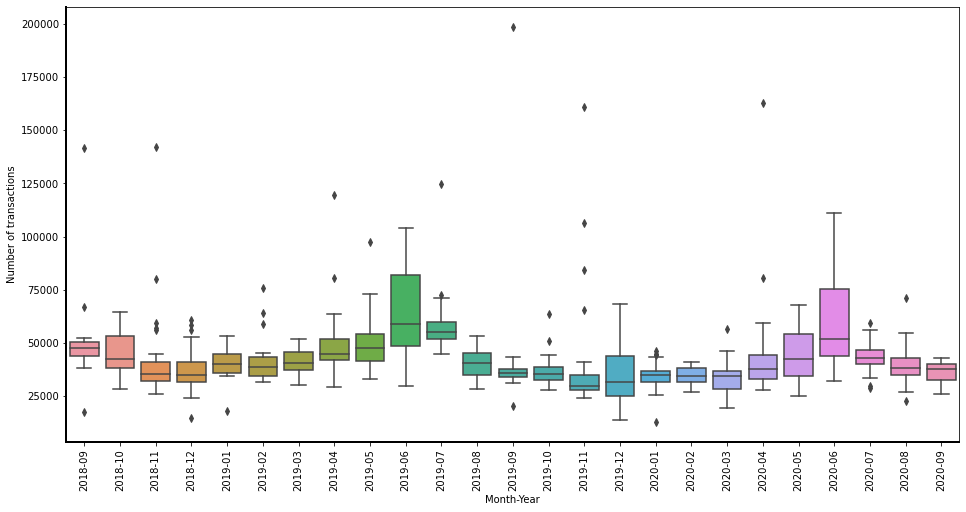

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(x='month_year', y='no_transactions', data=trans_gr_month)
plt.xticks(rotation=90)
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of transactions')
plt.show()

The bar chart above show us that per day usuall number of transactions lays in range about between 25,000 and 80,000 transactions per day. We see also that sales spikes during summertime and drops during winter.

### Price Column

Code source: [Robert Kwiatkowski]('https://www.kaggle.com/datark1/detailed-eda-understanding-h-m-data')

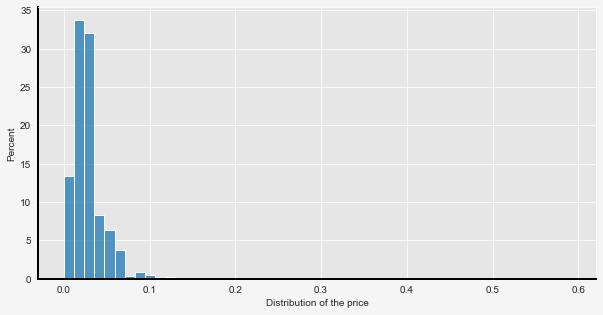

In [14]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
ax = sns.histplot(data=df_transactions, x='price', bins=50, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()

It's clear from the above graph that we have a lot of outliers. Let's look at the price after cutting the values above 0.1.



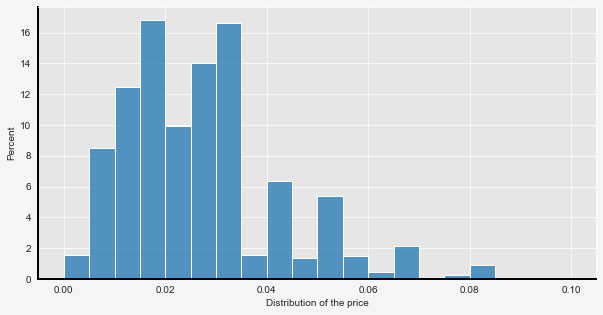

In [16]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
data = df_transactions[df_transactions['price']<0.1]
ax = sns.histplot(data=data, x='price', bins=20, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()

In [ ]:
# normal distribution with long right tail

### Price Outlier

Outliers for price:

In [50]:
pd.set_option('display.float_format', '{:.4f}'.format)
df_transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

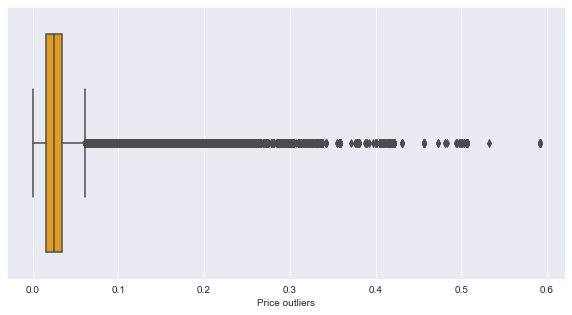

In [51]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df_transactions, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

In [ ]:
# Most of the stuff are inexpensive and some are super expensive
# 0.1 , 0.2, 0.3, 0.5 (almost $300, $400) 
# 590 / 2 = 

### Customer Spending Habit

Now, let's see how many transactions, on average, customers do.

In [44]:
t_by_customer = df_transactions.groupby('customer_id', as_index=False).size()

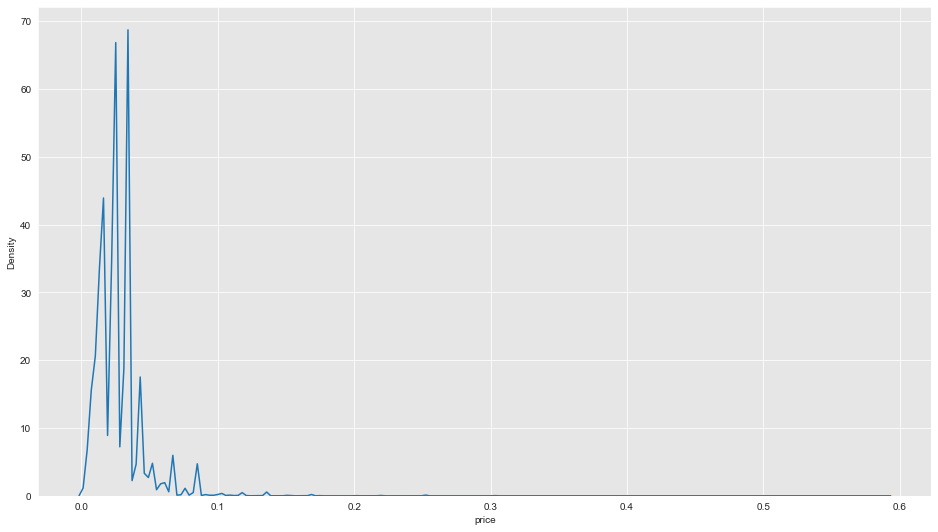

In [33]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.kdeplot(df_transactions.price, ax=ax)

In [ ]:
# most of the stuff they are selling is less than $50
# does it match with the stock?

Clearly there's a lot of outliers.

Used code from this [notebook](https://www.kaggle.com/vanguarde/h-m-eda-first-look) By Daniil Karpov

In [35]:
transactions_byid = df_transactions.groupby("customer_id").count()
customer_purchases = transactions_byid.sort_values(by="price", ascending=False)["price"]

In [36]:
customer_purchases[:300_000]

customer_id
 5854009424779598107    1895
 7398229172292340849    1441
 742206143892321423     1364
 3407358910964148684    1361
 1362310019195253974    1237
                        ... 
-8951007382086363207      31
-774242187185597926       31
 607289245997241168       31
-1706727184183266960      31
 2670159065248906425      31
Name: price, Length: 300000, dtype: int64

Text(0.5, 1.0, 'Purchases per customer')

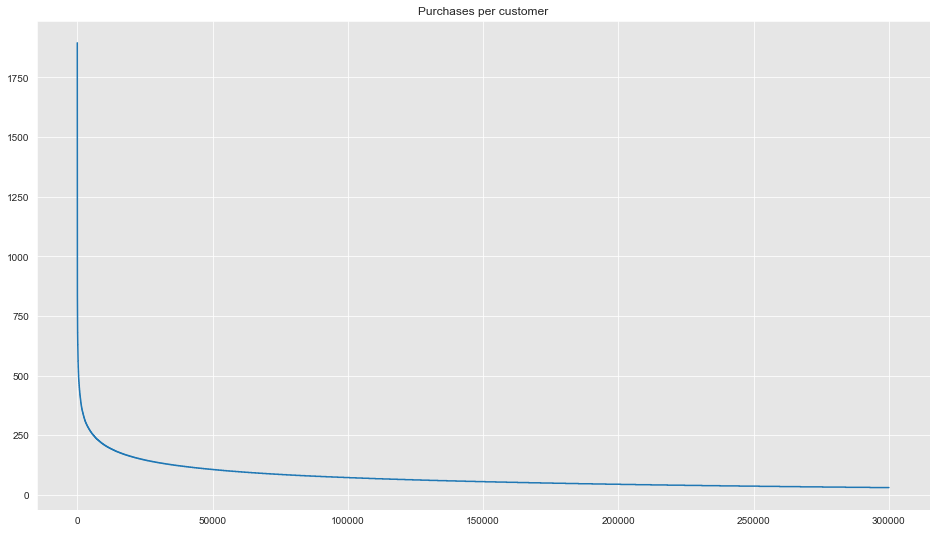

In [37]:
plt.figure(figsize=(16, 9))
plt.plot(list(range(300_000)), customer_purchases[:300_000])
plt.title("Purchases per customer")

In [ ]:
# zipf distribution, negative log distribution
# natural phenomenon, like language
# most language on the left side of the curve, but some on the right like elephant etc

There are whales who purchased 1000's of items over the years, essentially one item per day over the data set, but that the 300,000 ranked customers in terms of purchases have purchased > 30 items.

In [38]:
total = sum(customer_purchases)
total * 0.8

25430659.200000003

In [39]:
sum(customer_purchases[:419_600])

25430940

In [40]:
round(((419_600 / len(customer_purchases)) * 100), 2)

30.8

31 % of customers account for 80 % of items purchased.

On average, bought only few items during these 2 years.

### Top 10 customers by num of transactions.

In [63]:
transactions_byid = df_transactions.groupby('customer_id').count()

In [64]:
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

customer_id
 5854009424779598107    1895
 7398229172292340849    1441
 742206143892321423     1364
 3407358910964148684    1361
 1362310019195253974    1237
-4557035136527070563    1208
-4781325834093528838    1170
-6943172096873938826    1169
 1135991499650384534    1157
 8170076110479575893    1143
Name: price, dtype: int64

### Discount

Let's see now the popularity of sale channels.

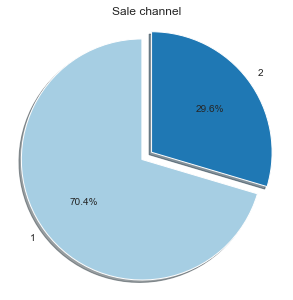

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(df_transactions['sales_channel_id'].value_counts(), explode=explode, labels=['1','2'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
ax.set_title('Sale channel')
plt.show()

### Scale of the price column

In this [discussion](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/310496) by [tbierhance](https://www.kaggle.com/tbierhance), the author found that the price scaling in the dataset is divided by 590, so we will multiply the price by 590 to get the real price.

In [23]:
temp1 = df_transactions.query("article_id == '0706016001'")[["t_dat", "price"]]
temp2 = df_transactions.query("article_id == '0706016002'")[["t_dat", "price"]]
temp3 = df_transactions.query("article_id == '0372860001'")[["t_dat", "price"]]
temp4 = df_transactions.query("article_id == '0610776002'")[["t_dat", "price"]]

In [24]:
temp1["price"] = temp1["price"] * 590

In [25]:
temp1["price"].value_counts()

19.99    34760
15.99     3510
17.99     3136
16.99      928
14.39      500
         ...  
14.93        1
14.98        1
16.31        1
13.29        1
15.20        1
Name: price, Length: 563, dtype: int64

### Price Discount

Source: [Jake]('https://www.kaggle.com/jakelj/h-m-fashion-comp-eda')

The discounts in 5% increments:

In [27]:
top = 19.99

price_discounts = [round(top - top * (i / 100), 2) for i in list(range(5, 100, 5))]

In [28]:
price_discounts

[18.99,
 17.99,
 16.99,
 15.99,
 14.99,
 13.99,
 12.99,
 11.99,
 10.99,
 9.99,
 9.0,
 8.0,
 7.0,
 6.0,
 5.0,
 4.0,
 3.0,
 2.0,
 1.0]

The banding pattern shows the level of discount:

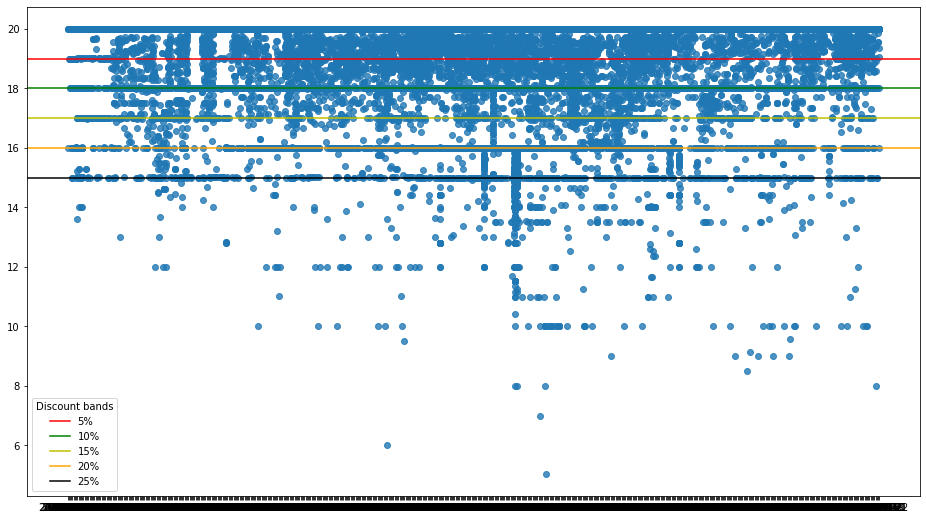

In [29]:
fig, ax = plt.subplots(figsize=(16, 9))
try:
    sns.regplot(x="t_dat", y="price", data=temp1, ax=ax)
except TypeError:
    pass
plt.axhline(y=18.99, color="r", linestyle="-", label="5%")
plt.axhline(y=17.99, color="g", linestyle="-", label="10%")
plt.axhline(y=16.99, color="y", linestyle="-", label="15%")
plt.axhline(y=15.99, color="orange", linestyle="-", label="20%")
plt.axhline(y=14.99, color="black", linestyle="-", label="25%")
plt.legend(title="Discount bands")

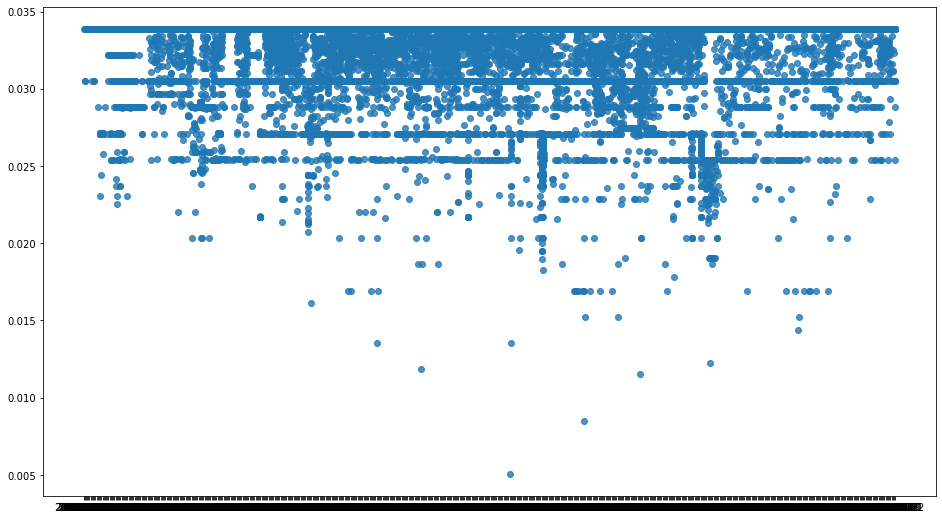

In [31]:
fig, ax = plt.subplots(figsize=(16, 9))
try:
    sns.regplot(x="t_dat", y="price", data=temp2, ax=ax)
except TypeError:
    pass

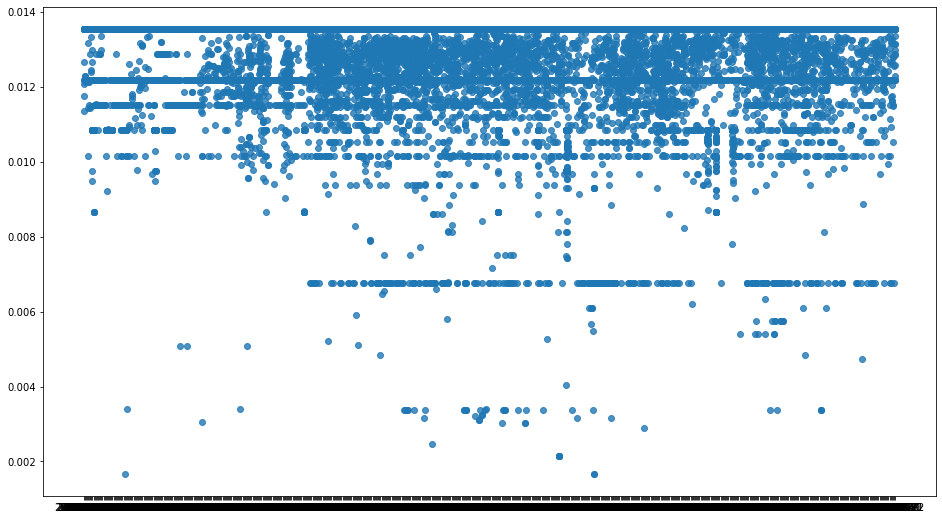

In [32]:
fig, ax = plt.subplots(figsize=(16, 9))
try:
    sns.regplot(x="t_dat", y="price", data=temp3, ax=ax)
except TypeError:
    pass

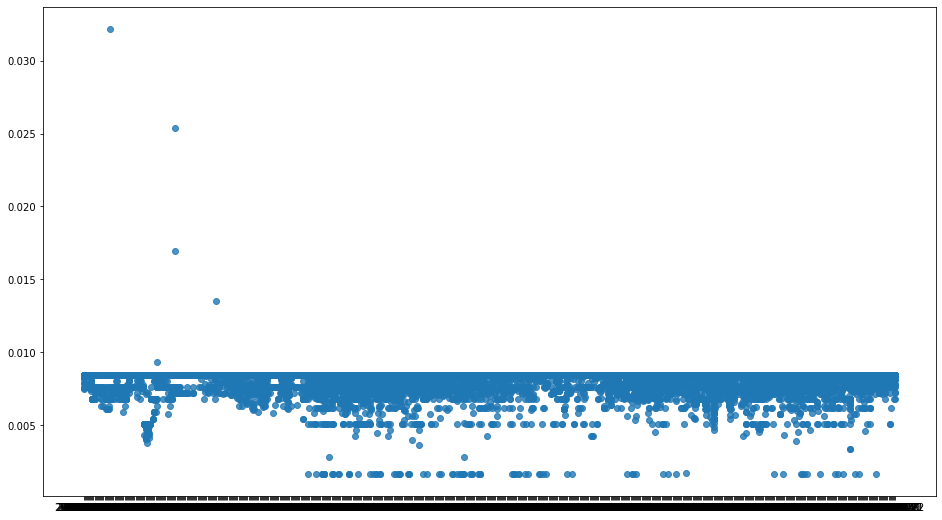

In [33]:
fig, ax = plt.subplots(figsize=(16, 9))
try:
    sns.regplot(x="t_dat", y="price", data=temp4, ax=ax)
except TypeError:
    pass